# Continuous Probabilistic Methods

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## First let's bring in some data to use.

## Next let's define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5

In [2]:
def get_lower_and_upper_bounds(series, k=1.5):
    q1, q3 = series.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    lower_bound = q1 - k * iqr
    return lower_bound, upper_bound

## Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
lemonade = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/6af5008fa40071d8b0e064655c2886ef/raw/389449c3c96959e97e38f5b93d7d6e69d3455b6a/lemonade.csv')
lemonade

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

nlemonade = lemonade.select_dtypes(include=numerics)
nlemonade

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
3,44.1,1.05,28,0.5,17
4,42.4,1.00,33,0.5,18
...,...,...,...,...,...
360,42.7,1.00,33,0.5,19
361,37.8,1.25,32,0.5,16
362,39.5,1.25,17,0.5,15
363,30.9,1.43,22,0.5,13


### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

#### First let's write a quick function that will show us the rows that have outliers

In [5]:
def see_outlier_rows(df, column_name, k=1.5, upper=False, lower=False):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[column_name], k)
    
    if upper and lower:
        return df[(df[column_name] > upper_bound) & (df[column_name] < lower_bound)]
    elif upper:
        return df[df[column_name] > upper_bound]
    elif lower:
        return df[df[column_name] < lower_bound]
    else:
        print('Please provide at least one true for upper or lower')

#### Now lets look at each column

In [6]:
see_outlier_rows(lemonade, 'Temperature', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


##### We can see here that the temperature is 15.1 which seems reasonable, but let's look a distribution to be sure

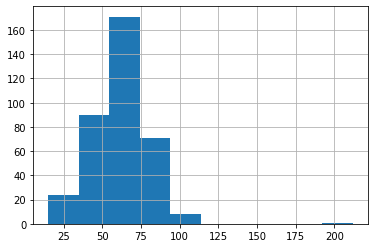

In [7]:
lemonade.Temperature.hist()

##### While that is a very low temperature, we will leave it as there as it is not impossible.

In [8]:
see_outlier_rows(lemonade, 'Rainfall', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


##### There appears to be now outliers with this criteria for Rainfall.

In [9]:
see_outlier_rows(lemonade, 'Flyers', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


##### Here we see that there were -38 flyers. This doesn't make sense so this would need to be removed.

In [10]:
see_outlier_rows(lemonade, 'Price', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


##### There appears to be now outliers with this criteria for Price.

In [11]:
see_outlier_rows(lemonade, 'Sales', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


##### There appears to be now outliers with this criteria for Sales.

### Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [12]:
see_outlier_rows(lemonade, 'Temperature', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


##### Since this temperature is boiling for Fahrenheit and even hotter in Celcius, this this would most likly need to be removed.

In [13]:
see_outlier_rows(lemonade, 'Rainfall', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


##### There seems to be a lot of outliers here so lets look at a distribution to see if this is uncommon.

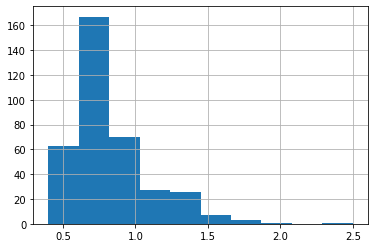

In [14]:
lemonade.Rainfall.hist()

##### These numbers don't appear to be impossible so we will leave them in for now

In [15]:
see_outlier_rows(lemonade, 'Flyers', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


##### Let's look at the distribution to see if these are abnormal

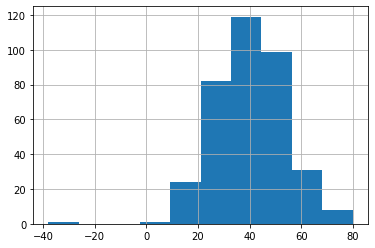

In [16]:
lemonade.Flyers.hist()

##### These outliers seem reasonable so we will leave them in for now.

In [17]:
see_outlier_rows(lemonade, 'Price', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


##### There appears to be now outliers with this criteria for Sales.

In [18]:
see_outlier_rows(lemonade, 'Sales', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
185,7/5/17,Wednesday,93.0,0.40,55,0.5,99
258,9/16/17,Saturday,68.1,0.69,37,0.5,87


##### Again let's look at the distribution to see if these are abnormal

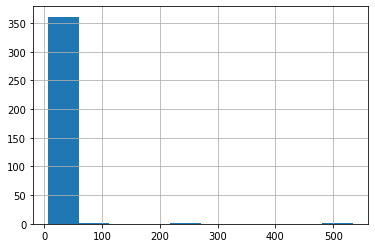

In [19]:
lemonade.Sales.hist()

##### So as we can see here, it seems very unlikely that we would sell over 100 so row 183 and 184 maybe wrong.

### Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [20]:
see_outlier_rows(lemonade, 'Temperature', k=3, lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [21]:
see_outlier_rows(lemonade, 'Rainfall', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [22]:
see_outlier_rows(lemonade, 'Flyers', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [23]:
see_outlier_rows(lemonade, 'Price', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [24]:
see_outlier_rows(lemonade, 'Sales', lower=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


### Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [25]:
see_outlier_rows(lemonade, 'Temperature', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [26]:
see_outlier_rows(lemonade, 'Rainfall', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [27]:
see_outlier_rows(lemonade, 'Flyers', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


In [28]:
see_outlier_rows(lemonade, 'Price', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [29]:
see_outlier_rows(lemonade, 'Sales', upper=True)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
185,7/5/17,Wednesday,93.0,0.40,55,0.5,99
258,9/16/17,Saturday,68.1,0.69,37,0.5,87


## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

* ### Use a 2 sigma decision rule to isolate the outliers.
    * ### Do these make sense?
    * ### Should certain outliers be kept or removed?

In [30]:
def use_sigma_rule(df, column_name, sigma):
    std = df[column_name].std()
    mean = df[column_name].mean()
    
    upper_bound = mean + (std * sigma)
    lower_bound = mean - (std * sigma)
    
    return df[(df[column_name] > upper_bound) | (df[column_name] < lower_bound)]

In [31]:
use_sigma_rule(lemonade, 'Temperature', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,43
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [32]:
use_sigma_rule(lemonade, 'Rainfall', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


In [33]:
use_sigma_rule(lemonade, 'Flyers', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,38
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [34]:
use_sigma_rule(lemonade, 'Price', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [35]:
use_sigma_rule(lemonade, 'Sales', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
185,7/5/17,Wednesday,93.0,0.40,55,0.5,99


## Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [36]:
use_sigma_rule(lemonade, 'Temperature', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [37]:
use_sigma_rule(lemonade, 'Rainfall', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [38]:
use_sigma_rule(lemonade, 'Flyers', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [39]:
use_sigma_rule(lemonade, 'Price', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [40]:
use_sigma_rule(lemonade, 'Sales', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
